# Contents
- [Imports](#imports)
- [Data Analysis](#analysis)
- [Feature Engineering](#fe)
    - [Removing Features](#remove)
    - [Feature Manipulation/Creation](#create)
    - [Data Check](#check)

---
# Imports<a id=imports></a>

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

We import the dataset that we had used in our first round of modelling.

In [31]:
data=pd.read_csv(r'./data/master.csv')

---
# Data Analysis<a id=analysis></a>

First, let us check that our datapoints correspond to the keypoints of a human body.<br/>
We will plot a scatterplot with an arbitrarily selected index 42 of our dataset. 

(1.0, 0.0)

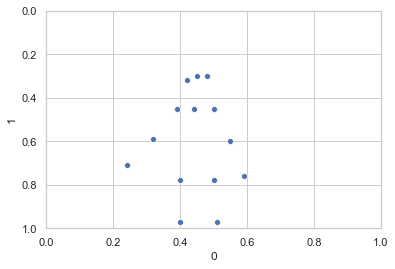

In [53]:
xlis=[]
ylis=[]
for x in range(1,18):
    xlis.append('x'+str(x))
    ylis.append('y'+str(x))
x=data[xlis].iloc[42].values
y=data[ylis].iloc[42].values
d42=pd.DataFrame([x,y]).transpose()
ax = sns.scatterplot(x=0,y=1,data=d42)
plt.xlim(0,1)
plt.ylim(0,1)
plt.ylim(reversed(plt.ylim()))

Next, let us examine the spread of x and y-coordinates. We will use a violinplot for this purpose.<br/>
We start by creating a melted dataframe with our keypoint ID and coordinates as our columns.

In [55]:
xlis=[]
ylis=[]
for x in range(1,18):
    xlis.append('x'+str(x))
    ylis.append('y'+str(x))
xmelt=pd.melt(data[xlis])
display(xmelt.head())
ymelt=pd.melt(data[ylis])
display(ymelt.head())

,variable,value
0,x1,0.53
1,x1,0.53
2,x1,0.53
3,x1,0.52
4,x1,0.52


,variable,value
0,y1,0.42
1,y1,0.42
2,y1,0.43
3,y1,0.43
4,y1,0.43


Now we can plot our violinplots for our x-coordinates.

(0, 1)

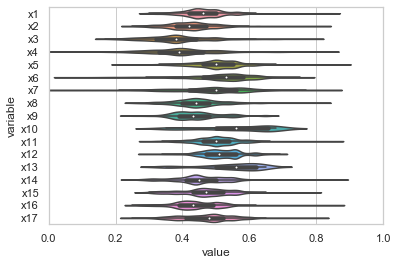

In [64]:
ax = sns.violinplot(x="value", y="variable", data=xmelt,orient='h')
plt.xlim(0, 1)

We find that our x-coordinates are all over the place which makes sense with the spread of movements and angles in our data.<br/>

Next, we plot our violinplots for y-coordinates

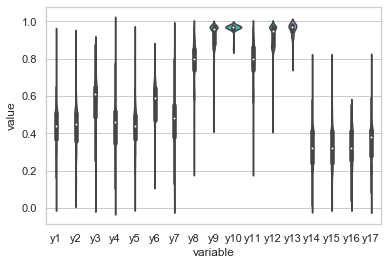

In [33]:
ax = sns.violinplot(x="variable", y="value", data=ymelt)

And we find the same for our y-coordinates.<br/>
Keypoints y8 to y13 correspond to lower bodyparts which explains why the data is clustered in the higher values (higher values correspond to lower positions).<br/>

Next, let us examine left wrist positions for jab movements.

In [6]:
jablwrist=data[data.move==2][['x7','y7']]

(1.0, 0.0)

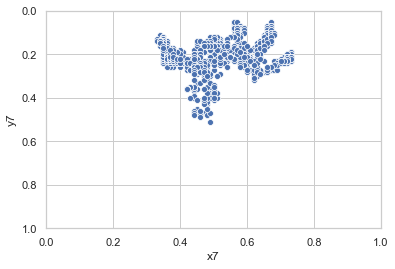

In [21]:
ax = sns.scatterplot(x='x7',y='y7',data=jablwrist)
plt.xlim(0,1)
plt.ylim(0,1)
plt.ylim(reversed(plt.ylim()))

Out left wrist positions can be said to be clustered towards the top, and that makes sense as our jab training data was mostly at eye-level.<br/>
However, with the variations in angle and movements we can see that the coordinates are spread around the x-axis.<br/>
This can explain why our jabs are not classified in the crouching position due to the y-coordinate grouping.<br/>

Next, we plot left wrist positions for all our moves.

(1.0, 0.0)

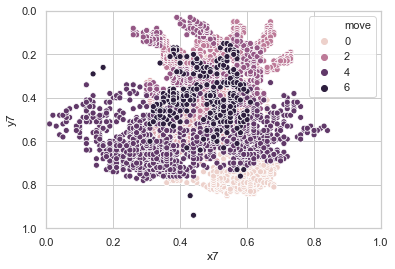

In [22]:
ax = sns.scatterplot(x='x7',y='y7',hue='move',data=data)
plt.xlim(0,1)
plt.ylim(0,1)
plt.ylim(reversed(plt.ylim()))

We can observe that grouping is very difficult with the spread and that can explain our lackluster results on our test data.<br/>

We create a violinplot of our left wrist coordinates for our different moves as well.

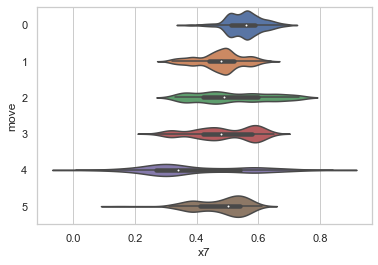

In [66]:
ax = sns.violinplot(x='x7',y='move',data=data,orient='h')

And a violinplot of our right wrist coordinates for our different moves.

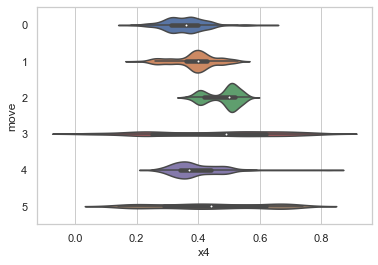

In [67]:
ax = sns.violinplot(x='x4',y='move',data=data,orient='h')

We can observe that naive classification without any feature engineering is not feasible.<br/>
We need a more relational way of classifying our boxing moves.

---
# Feature Engineering<a id=fe></a>
## Removing Features<a id=remove></a>
For our purposes of boxing move classification, the most important body parts to take note of will be the neck, shoulder, elbows and wrists.<br/>
While hip position and footwork play a part in actual prediction of boxing movements, we will try to reduce the number of our features and create new ones that will hopefully serve as better predictors.<br/>
The keypoint-numbering can be found [here](https://github.com/ildoonet/tf-pose-estimation/blob/460dfab9a73784455c314c7a979dd87a36b35f4f/tf_pose/common.py), and we will firstly drop all lower-body body parts from our features.<br/>

We create a list of features that we are interested in.

In [9]:
#features of interest to us
xparts=['x1','x2','x3','x4','x5','x6','x7','x8','x11']
yparts=['y1','y2','y3','y4','y5','y6','y7','y8','y11']

And we drop our unwanted features.

In [10]:
#create a list of features that we wish to drop
drop=[x for x in list(data.columns) if x not in xparts+yparts+['move']]
drop

['x0',
 'x10',
 'x12',
 'x13',
 'x14',
 'x15',
 'x16',
 'x17',
 'x9',
 'y0',
 'y10',
 'y12',
 'y13',
 'y14',
 'y15',
 'y16',
 'y17',
 'y9']

In [7]:
data.drop(columns=drop,inplace=True)
data

,move,x1,x11,x2,x3,x4,x5,x6,x7,x8,y1,y11,y2,y3,y4,y5,y6,y7,y8
0,0,0.53,0.52,0.51,0.54,0.63,0.55,NaN,NaN,0.50,0.42,0.74,0.42,0.61,0.78,0.42,NaN,NaN,0.75
1,0,0.53,0.55,0.51,0.53,0.59,0.55,NaN,NaN,0.50,0.42,0.75,0.43,0.61,0.75,0.42,NaN,NaN,0.74
2,0,0.53,0.55,0.50,0.52,0.59,0.55,NaN,NaN,0.50,0.43,0.75,0.43,0.61,0.78,0.43,NaN,NaN,0.74
3,0,0.52,0.54,0.50,0.51,0.57,0.55,NaN,NaN,0.50,0.43,0.73,0.43,0.61,0.80,0.43,NaN,NaN,0.73
4,0,0.52,0.53,0.50,0.50,0.55,0.55,NaN,NaN,0.49,0.43,0.74,0.43,0.61,0.78,0.43,NaN,NaN,0.74
5,0,0.52,0.55,0.50,0.49,0.54,0.55,0.56,0.59,0.49,0.43,0.74,0.42,0.61,0.80,0.43,0.61,0.75,0.74
6,0,0.52,0.55,0.49,0.48,0.51,0.55,0.56,0.59,0.49,0.44,0.74,0.43,0.61,0.81,0.45,0.61,0.75,0.74
7,0,0.52,0.55,0.49,0.47,0.49,0.56,0.57,0.59,0.49,0.44,0.74,0.43,0.62,0.80,0.46,0.62,0.81,0.74
8,0,0.52,0.56,0.49,0.46,0.47,0.56,0.58,0.59,0.50,0.45,0.75,0.43,0.62,0.79,0.46,0.64,0.82,0.75
9,0,0.52,0.56,0.49,0.46,0.46,0.56,0.58,0.59,0.49,0.45,0.76,0.43,0.62,0.79,0.46,0.64,0.80,0.75


## Feature Manipulation/Creation<a id=create></a>
Next, we shall perform a few transformations to our data.<br/>
Let us start by normalizing all our coordinates to the position of the neck.<br/>
We do this as we do not want our predictor to be spatially dependent, but for out predictor to make decisions based on the human movement. 

In [81]:
#Normalize all coordinates to the x1 y1 points which correspond to the neck
data[xparts]=data[xparts].subtract(data['x1'],axis=0)
data[yparts]=data[yparts].subtract(data['y1'],axis=0)
data.head()

,move,x1,x11,x2,x3,x4,x5,x6,x7,x8,y1,y11,y2,y3,y4,y5,y6,y7,y8
0,0,0.0,-0.01,-0.02,0.01,0.10,0.02,NaN,NaN,-0.03,0.0,0.32,0.00,0.19,0.36,0.0,NaN,NaN,0.33
1,0,0.0,0.02,-0.02,0.00,0.06,0.02,NaN,NaN,-0.03,0.0,0.33,0.01,0.19,0.33,0.0,NaN,NaN,0.32
2,0,0.0,0.02,-0.03,-0.01,0.06,0.02,NaN,NaN,-0.03,0.0,0.32,0.00,0.18,0.35,0.0,NaN,NaN,0.31
3,0,0.0,0.02,-0.02,-0.01,0.05,0.03,NaN,NaN,-0.02,0.0,0.30,0.00,0.18,0.37,0.0,NaN,NaN,0.30
4,0,0.0,0.01,-0.02,-0.02,0.03,0.03,NaN,NaN,-0.03,0.0,0.31,0.00,0.18,0.35,0.0,NaN,NaN,0.31


Next, let us inspect our datatypes and null values.

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9900 entries, 0 to 535
Data columns (total 19 columns):
move    9900 non-null int64
x1      9900 non-null float64
x11     9859 non-null float64
x2      9818 non-null float64
x3      9052 non-null float64
x4      8541 non-null float64
x5      9876 non-null float64
x6      9322 non-null float64
x7      9064 non-null float64
x8      9833 non-null float64
y1      9900 non-null float64
y11     9859 non-null float64
y2      9818 non-null float64
y3      9052 non-null float64
y4      8541 non-null float64
y5      9876 non-null float64
y6      9322 non-null float64
y7      9064 non-null float64
y8      9833 non-null float64
dtypes: float64(18), int64(1)
memory usage: 1.5 MB


It seems that there are null values present in our dataset.<br/>
Ideally, the way we should fill these null values should be through forward and backward filling as prevous body part coordinates will influence future coordinates.<br/>
However, as our deployment model will not be time-based/a time series, we take the naive route and fill all NaN values with 0 (neck coordinate).<br/>
We believe that it is alright to handle NaN values in this manner with their proportion in our dataset.  

In [83]:
data.fillna(0,inplace=True)

Next, we shall create the following new features:

|New Feature|abbreviation|
|---|---|
|Shoulder Width|shwidth|
|Spine Length|splength|
|Distance from left hand to shoulder|lhnsh|
|Distance from right hand to shoulder|rhnsh|
|Distance from left elbow to shoulder|lelsh|
|Distance from right elbow to shoulder|relsh|

We create the shoulder width feature to account for the rotation of the person with respect to the camera. The larger the shoulder width (person facing camera), the smaller the coordinate deviations for the upper body keypoints.<br/>
We create the spine length feature to account for the distance of the person from the camera. The larger the spine length, the closer the person is to the camera and the more pronounced the coordinate deviations for the upper body keypoints.<br/>
As such, when creating our distance features, we scale the distances by multiplying by the shoulder width to account for the person's rotation, and dividing by the spine length to account for the person's distance with respect to the camera.<br/>

To create our distance values, we simply calculate the hypotenuse values between the x and y coordinates of any two keypoints.

In [84]:
data['shwidth']=np.hypot((data.x2-data.x5),(data.y2-data.y5))
data['splength']=np.hypot((data.x1-((data.x8+data.x11)/2)),(data.y1-((data.y8+data.y11)/2))) #we take the base of the spine to be the midpoint between our left and right hip keypoints (points 8 and 11)
data['lhnsh']=np.hypot((data.x7-data.x5),(data.y7-data.y5))*data.shwidth/data.splength
data['rhnsh']=np.hypot((data.x4-data.x2),(data.y4-data.y2))*data.shwidth/data.splength
data['lelsh']=np.hypot((data.x6-data.x5),(data.y6-data.y5))*data.shwidth/data.splength
data['relsh']=np.hypot((data.x3-data.x2),(data.y3-data.y2))*data.shwidth/data.splength
data

,move,x1,x11,x2,x3,x4,x5,x6,x7,x8,...,y5,y6,y7,y8,shwidth,splength,lhnsh,rhnsh,lelsh,relsh
0,0,0.0,-0.01,-0.02,0.01,0.10,0.02,0.00,0.00,-0.03,...,0.00,0.00,0.00,0.33,0.040000,0.325615,0.002457,0.046616,0.002457,0.023630
1,0,0.0,0.02,-0.02,0.00,0.06,0.02,0.00,0.00,-0.03,...,0.00,0.00,0.00,0.32,0.041231,0.325038,0.002537,0.041841,0.002537,0.022973
2,0,0.0,0.02,-0.03,-0.01,0.06,0.02,0.00,0.00,-0.03,...,0.00,0.00,0.00,0.31,0.050000,0.315040,0.003174,0.057356,0.003174,0.028744
3,0,0.0,0.02,-0.02,-0.01,0.05,0.03,0.00,0.00,-0.02,...,0.00,0.00,0.00,0.30,0.050000,0.300000,0.005000,0.062761,0.005000,0.030046
4,0,0.0,0.01,-0.02,-0.02,0.03,0.03,0.00,0.00,-0.03,...,0.00,0.00,0.00,0.31,0.050000,0.310161,0.004836,0.056995,0.004836,0.029017
5,0,0.0,0.03,-0.02,-0.03,0.02,0.03,0.04,0.07,-0.03,...,0.00,0.18,0.32,0.31,0.050990,0.310000,0.053045,0.062849,0.029653,0.031295
6,0,0.0,0.03,-0.03,-0.04,-0.01,0.03,0.04,0.07,-0.03,...,0.01,0.17,0.31,0.30,0.063246,0.300000,0.063805,0.080222,0.033797,0.038006
7,0,0.0,0.03,-0.03,-0.05,-0.03,0.04,0.05,0.07,-0.03,...,0.02,0.18,0.37,0.30,0.076158,0.300000,0.089176,0.093928,0.040697,0.048500
8,0,0.0,0.04,-0.03,-0.06,-0.05,0.04,0.06,0.07,-0.02,...,0.01,0.19,0.37,0.30,0.076158,0.300167,0.091655,0.091479,0.045950,0.048804
9,0,0.0,0.04,-0.03,-0.06,-0.06,0.04,0.06,0.07,-0.03,...,0.01,0.19,0.35,0.30,0.076158,0.305041,0.085216,0.090191,0.045216,0.048024


We check for any null values in our engineered dataset.

In [94]:
data[data.isnull().any(axis=1)]

,move,x1,x11,x2,x3,x4,x5,x6,x7,x8,...,y5,y6,y7,y8,shwidth,splength,lhnsh,rhnsh,lelsh,relsh
469,4,0.0,0.0,-0.03,-0.06,-0.01,0.00,0.00,0.00,0.0,...,0.0,0.00,0.00,0.0,0.031623,0.0,NaN,inf,NaN,inf
1189,4,0.0,0.0,0.00,0.00,0.00,0.01,0.00,0.00,0.0,...,0.0,0.00,0.00,0.0,0.010000,0.0,inf,NaN,inf,NaN
1243,4,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.00,0.00,0.0,0.010000,0.0,NaN,inf,NaN,inf
1262,4,0.0,0.0,0.00,0.00,0.00,0.01,-0.21,-0.27,0.0,...,0.0,0.01,0.23,0.0,0.010000,0.0,inf,NaN,inf,NaN
1263,4,0.0,0.0,0.00,0.00,0.00,0.01,-0.22,-0.26,0.0,...,0.0,0.03,0.23,0.0,0.010000,0.0,inf,NaN,inf,NaN
1264,4,0.0,0.0,0.00,0.00,0.00,0.01,-0.22,-0.24,0.0,...,0.0,0.05,0.21,0.0,0.010000,0.0,inf,NaN,inf,NaN


We observe datapoints with NaN values that result from NaN keypoint coordinates filled in with 0s.<br/>
As the proportion of datapoints with NaN values are small, we drop these datapoints.

In [105]:
data.drop(index=list(data[data.isnull().any(axis=1)].index),inplace=True)

As a result of filling in our NaN values with 0, some of our spine lengths are 0 and this results in distances of infinity as we divide our distances by our spine lengths.<br/>
As the proportion of such datapoints is relatively small, we go ahead and drop datapoints with spine lengths of 0.

In [106]:
data[data['splength']==0]

,move,x1,x11,x2,x3,x4,x5,x6,x7,x8,...,y5,y6,y7,y8,shwidth,splength,lhnsh,rhnsh,lelsh,relsh
457,4,0.0,0.0,-0.02,0.00,0.00,0.01,0.00,0.00,0.0,...,0.00,0.00,0.00,0.0,0.030000,0.0,inf,inf,inf,inf
696,4,0.0,0.0,0.05,0.00,0.00,-0.04,-0.15,-0.28,0.0,...,-0.02,0.03,0.13,0.0,0.098489,0.0,inf,inf,inf,inf
1194,4,0.0,0.0,-0.02,0.00,0.00,0.01,0.00,0.00,0.0,...,0.01,0.00,0.00,0.0,0.031623,0.0,inf,inf,inf,inf
1195,4,0.0,0.0,-0.01,0.00,0.00,0.02,0.00,0.00,0.0,...,0.00,0.00,0.00,0.0,0.030000,0.0,inf,inf,inf,inf
1203,4,0.0,0.0,-0.01,0.00,0.00,0.02,0.00,0.00,0.0,...,0.00,0.00,0.00,0.0,0.030000,0.0,inf,inf,inf,inf
1207,4,0.0,0.0,-0.01,0.00,0.00,0.01,0.00,0.00,0.0,...,0.01,0.00,0.00,0.0,0.022361,0.0,inf,inf,inf,inf
1226,4,0.0,0.0,0.03,0.00,0.00,-0.01,-0.15,-0.26,0.0,...,-0.01,-0.01,0.18,0.0,0.040000,0.0,inf,inf,inf,inf
1227,4,0.0,0.0,-0.01,0.00,0.00,0.02,-0.19,-0.26,0.0,...,0.00,0.00,0.18,0.0,0.031623,0.0,inf,inf,inf,inf
1228,4,0.0,0.0,-0.01,0.00,0.00,0.02,-0.20,-0.25,0.0,...,0.00,0.01,0.16,0.0,0.030000,0.0,inf,inf,inf,inf
1232,4,0.0,0.0,-0.02,0.00,0.00,0.02,0.00,0.00,0.0,...,0.00,0.00,0.00,0.0,0.040000,0.0,inf,inf,inf,inf


In [107]:
data.drop(index=list(data[data['splength']==0].index),inplace=True)

In [109]:
data.to_csv(r'.\data\feateng.csv',index=False)

## Data Check<a id=check></a>
Let us check if our feature engineering gives us any better means of classification.<br/>
First we check the spread of values of our newly-engineered features with a violinplot.

In [69]:
data=pd.read_csv(r'.\data\feateng.csv')

In [40]:
data[['shwidth','splength','lhnsh','rhnsh','lelsh','relsh']]

,shwidth,splength,lhnsh,rhnsh,lelsh,relsh
0,0.040000,0.325615,0.002457,0.046616,0.002457,0.023630
1,0.041231,0.325038,0.002537,0.041841,0.002537,0.022973
2,0.050000,0.315040,0.003174,0.057356,0.003174,0.028744
3,0.050000,0.300000,0.005000,0.062761,0.005000,0.030046
4,0.050000,0.310161,0.004836,0.056995,0.004836,0.029017
5,0.050990,0.310000,0.053045,0.062849,0.029653,0.031295
6,0.063246,0.300000,0.063805,0.080222,0.033797,0.038006
7,0.076158,0.300000,0.089176,0.093928,0.040697,0.048500
8,0.076158,0.300167,0.091655,0.091479,0.045950,0.048804
9,0.076158,0.305041,0.085216,0.090191,0.045216,0.048024


In [41]:
melt=pd.melt(data[['shwidth','splength','lhnsh','rhnsh','lelsh','relsh']])
melt.head()

,variable,value
0,shwidth,0.040000
1,shwidth,0.041231
2,shwidth,0.050000
3,shwidth,0.050000
4,shwidth,0.050000


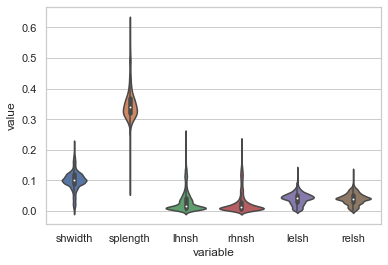

In [42]:
ax = sns.violinplot(x="variable", y="value", data=melt)

It seems that our engineered features are ok. Our values are constrained, reflecting the boundaries of our movements.<br/>

We plot the violinplots of our moves against the right hand-to-shoulder distance to examine the variations in our right hand-movements.

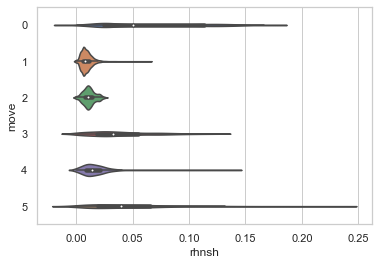

In [70]:
ax = sns.violinplot(x='rhnsh',y='move',data=data,orient='h')

Our plot makes sense as classes 1, 2 and 4 (guard, jab and hook) are strongly clustered reflecting how the right hand stays mostly in the guard position.<br/>
Class 0 refers to non-boxing moves where the right hand can move all around the video frame.<br/>
Class 3 refers to a cross where we can observe the even spread of our right hand punching movement.<br/>
Class 5 refers to an uppercut and we observe the same spread of our right hand movements.<br/>

We plot one last violinplot of our moves against the left hand-to-shoulder distance.

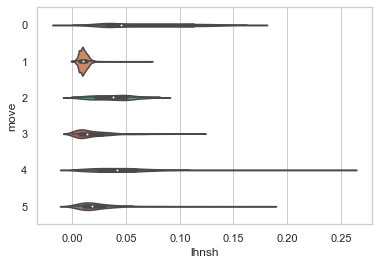

In [71]:
ax = sns.violinplot(x='lhnsh',y='move',data=data,orient='h')

We observe classes 0, 2 and 4 (non-boxing, jab and hook) as being more spread out compared to 1, 3 and 5 (guard, cross and uppercut).<br/>
At the very least, these two new features we've engineered will aid us in separating jabs and hooks from crosses and uppercuts.<br/>

Now that our feature engineering is done, we proceed with a second round of modelling and testing.